# Задача 1.4 #
*Рассмотреть систему без ограничений на длину очереди, учитывающей фактор ухода клиентов из очереди (среднее приемлемое время ожидания – Tw). Построить графики от числа операторов (вплоть до 15): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.*

## Исходные данные и подгрузка библиотек для расчета и визуализации

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [72]:
number = 1
day_of_birth = 9
month_of_birth = 1
#t_c среднее время между поступлением заявок, t_s - средняя продолжительность обслуживания заявки, t_w - среднее приемлемое время ожидания обслуживания
t_c = 10 + number
t_s = 40+ day_of_birth
t_w = 100 + month_of_birth
print(f"ВАРИАНТ:\nTc = {t_c} секунд \nTs = {t_s} секунд\nTw = {t_w} секунд")

ВАРИАНТ:
Tc = 11 секунд 
Ts = 49 секунд
Tw = 101 секунд


## Рассчетная и графическая часть

In [73]:
#lmbd - интенсивность поступления заявок, mu - интенсивность обслуживания заявок
lmbd=1/t_c
mu=1/t_s
nu = 1/t_w
n, m = 15, 15 #число операторов и мест в очереди
lmbd_mu = lmbd/(mu)

print(f"Интенсивность покидания очереди: {round(nu,3)} потерянных звонков/секунда'\n\
Интенсивность поступления заявок: {lmbd} заявок/секунда\n\
Интенсивность обслуживания заявок: {mu} обслуженных заявок/секунда\n\
Приведенная интенсивность обслуживания заявок: {lmbd_mu} обслуженных заявок/секунда\n")

Интенсивность покидания очереди: 0.01 потерянных звонков/секунда'
Интенсивность поступления заявок: 0.09090909090909091 заявок/секунда
Интенсивность обслуживания заявок: 0.02040816326530612 обслуженных заявок/секунда
Приведенная интенсивность обслуживания заявок: 4.454545454545455 обслуженных заявок/секунда



**Найдем количество членов ряда для нахождения его суммы с требуемой точностью**

In [74]:
#Для нахождения суммы ряда с точностью epsilon найдем количество членов ряда m (исходя из формулы из учебников)
#количество членов будет равно r-1. Формула выводится из оценки остатка ряда в форме Лагранжа
#Формула зависит только от lambda, mu и nu
r = 1
epsilon = 0.01 #точность для ряда
while ( (1/math.factorial(r))*pow((lmbd_mu/(nu*t_s)),r)*math.exp((lmbd_mu/(nu*t_s)))>epsilon):
    r=r+1
else:
    print(f"Количество членов ряда для его нахождения с точностью {epsilon} = {r-1}")
    m = r-1



Количество членов ряда для его нахождения с точностью 0.01 = 34


In [75]:
n_it = np.arange(1,n+1)
r_it = np.arange(1,m+1)
koef = []
for i in range(0,n):
    for j in range(0,m):
        if j==0:
            koef.append([(i+1)*mu+1*nu])
        else:
            koef[i].append(((i+1)*mu+(j+1)*nu)*koef[i][j-1])

koef = np.array(koef)


pi_p0 = np.array([(pow(lmbd_mu,i+1))/(math.factorial(i+1)) for i in range(0,n)]) 

p_nr_p0 = np.array([(pow(lmbd_mu,i+1)*pow(lmbd,j+1))/(math.factorial(i+1)*koef[i][j]) for i in range(0,n) for j in range(0,m)]).reshape(n,m)

p_0 = np.array([1/(1+pi_p0[0:i+1].sum()+p_nr_p0[i].sum()) for i in range(0,n)])

m_n = np.array([np.dot(n_it[0:i+1],pi_p0[0:i+1])*p_0[i]+p_nr_p0[i].sum()*p_0[i]*n_it[i] for i in range(0,n)])

m_q = np.array([np.dot(r_it,p_nr_p0[i])*p_0[i] for i in range(0,n)])

k_z = np.array([m_n[i]/n_it[i] for i in range(0,n)])

p_q = np.array([pi_p0[i]*p_0[i]+p_nr_p0[i].sum()*p_0[i] for i in range(0,n)])


In [76]:
print(p_0)

[0.00105333 0.00335534 0.00632563 0.00880012 0.01031762 0.01107881
 0.01141414 0.01154905 0.01159953 0.01161723 0.01162306 0.01162487
 0.0116254  0.01162555 0.01162559]


In [77]:
a = np.array([lmbd_mu/n_it[i] for i in range(0,n)])


Формирование таблицы для графиков

In [78]:
final_table = pd.DataFrame(list(zip(n_it,p_0, a, m_n, m_q, k_z, p_q)),columns =['Число операторов','P_0', 'Коэффициент а', 'Мат.ожидание числа занятых операторов','Мат.ожидание длины очереди' ,'Коэффициент загрузки операторов', 'Вероятность существования очереди'])
final_table.head(15)


,Число операторов,P_0,Коэффициент а,Мат.ожидание числа занятых операторов,Мат.ожидание длины очереди,Коэффициент загрузки операторов,Вероятность существования очереди
0,1,0.001053,4.454545,0.998947,7.122765,0.998947,0.998947
1,2,0.003355,2.227273,1.978343,5.104010,0.989171,0.981698
2,3,0.006326,1.484848,2.861908,3.282783,0.953969,0.902737
3,4,0.008800,1.113636,3.542935,1.879034,0.885734,0.735046
4,5,0.010318,0.890909,3.984205,0.969477,0.796841,0.520087
5,6,0.011079,0.742424,4.232015,0.458686,0.705336,0.322751
6,7,0.011414,0.636364,4.356892,0.201285,0.622413,0.178391
7,8,0.011549,0.556818,4.414581,0.082375,0.551823,0.088929
8,9,0.011600,0.494949,4.439257,0.031513,0.493251,0.040346
9,10,0.011617,0.445455,4.449071,0.011285,0.444907,0.016772


In [79]:
#Учитываем, что коэффициент а должен быть строго меньше 1
final_table_f = final_table[final_table['Коэффициент а']<1]
final_table_f.head(15)

,Число операторов,P_0,Коэффициент а,Мат.ожидание числа занятых операторов,Мат.ожидание длины очереди,Коэффициент загрузки операторов,Вероятность существования очереди
4,5,0.010318,0.890909,3.984205,0.969477,0.796841,0.520087
5,6,0.011079,0.742424,4.232015,0.458686,0.705336,0.322751
6,7,0.011414,0.636364,4.356892,0.201285,0.622413,0.178391
7,8,0.011549,0.556818,4.414581,0.082375,0.551823,0.088929
8,9,0.011600,0.494949,4.439257,0.031513,0.493251,0.040346
9,10,0.011617,0.445455,4.449071,0.011285,0.444907,0.016772
10,11,0.011623,0.404959,4.452708,0.003788,0.404792,0.006425
11,12,0.011625,0.371212,4.453966,0.001194,0.371164,0.002279
12,13,0.011625,0.342657,4.454374,0.000354,0.342644,0.000752
13,14,0.011626,0.318182,4.454497,0.000099,0.318178,0.000232


array([<Axes: xlabel='Число операторов'>,
       <Axes: xlabel='Число операторов'>,
       <Axes: xlabel='Число операторов'>,
       <Axes: xlabel='Число операторов'>], dtype=object)

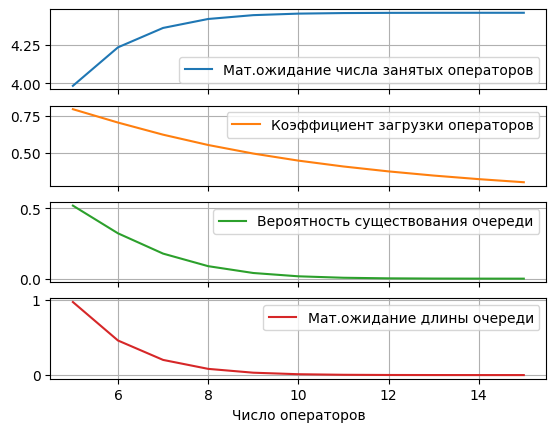

In [80]:
final_table_f.plot(x='Число операторов',y= ['Мат.ожидание числа занятых операторов', 'Коэффициент загрузки операторов','Вероятность существования очереди','Мат.ожидание длины очереди'], grid = True, subplots = True)